In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('invest_db.csv', sep = ';')
df

,id,date,age,education_level_cd,marital_status_cd,children_cnt,monthly_income_amt,invest_utilization_dt,forts_flg,margin_status_flg,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
0,1479787897,2024-04-20,33,NaN,UNM,"0,0","31272,0",2023-09-13,1,0,...,"428,0","0,0","0,0","-11298,0","541,0","0,0","0,0","0,0","0,0","0,0"
1,601760063,2024-02-01,29,GRD,UNM,"0,0","6284,0",2021-03-29,0,0,...,"23,0","0,0","0,0",NaN,"8115,0","0,0","0,0","0,0","0,0","0,0"
2,61175329,2024-02-10,38,SCH,MAR,"0,0","1904,0",2023-12-05,1,0,...,"193,0","0,0","0,0","0,0","25,0",NaN,"0,0","0,0","0,0","2,0"
3,1411700618,2024-03-05,64,NaN,NaN,"0,0",NaN,2021-09-16,0,0,...,"0,0","0,0","0,0",NaN,"65,0",NaN,"0,0","0,0","0,0","0,0"
4,2096755145,2024-02-10,31,NaN,UNM,"0,0",NaN,2022-03-01,0,0,...,"0,0","0,0","0,0","0,0","0,0",NaN,"0,0","0,0","0,0","0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458365,324374950,2024-04-29,28,NaN,NaN,"0,0",NaN,2021-04-23,1,0,...,"148,0","0,0","0,0",NaN,"310,0",NaN,"0,0","0,0","0,0","21,0"
458366,1903825748,2024-02-19,46,NaN,NaN,"0,0","2524,0",2020-12-10,1,0,...,"429,0","0,0","0,0","0,0","5068,0",NaN,"0,0","0,0","0,0","6,0"
458367,1825570440,2024-03-21,49,GRD,MAR,"0,0","6267,0",2021-03-11,1,1,...,"467,0","0,0","0,0","0,0","280,0",NaN,"0,0","0,0","0,0","7,0"
458368,744042474,2024-02-13,34,GRD,MAR,"1,0","4713,0",2020-05-22,1,1,...,"0,0","0,0","0,0","-194237,0","537,0","-34401,0","0,0","0,0","0,0","0,0"


In [137]:
df.info() #51 колонка, абсолютное большинство переменных - количественные, но много пустых значений, а также неверный формат (вместо точки - запятая), из-за чего у большинства числовых колонок object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458370 entries, 0 to 458369
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        458370 non-null  int64 
 1   date                      458370 non-null  object
 2   age                       458370 non-null  int64 
 3   education_level_cd        233460 non-null  object
 4   marital_status_cd         267030 non-null  object
 5   children_cnt              410310 non-null  object
 6   monthly_income_amt        355140 non-null  object
 7   invest_utilization_dt     458370 non-null  object
 8   forts_flg                 458370 non-null  int64 
 9   margin_status_flg         458370 non-null  int64 
 10  qualified_investor_flg    458370 non-null  int64 
 11  in_payment_rub_amt        458370 non-null  object
 12  out_payment_rub_amt       458370 non-null  object
 13  uncovered_position_amt    458370 non-null  object
 14  turn

In [138]:
df = df.fillna(0)
df['id'].nunique() #количество уникальных пользователей (инвесторов)

5093

In [139]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df['invest_utilization_dt'] = pd.to_datetime(df['invest_utilization_dt'], format='%Y-%m-%d', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458370 entries, 0 to 458369
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        458370 non-null  int64         
 1   date                      458370 non-null  datetime64[ns]
 2   age                       458370 non-null  int64         
 3   education_level_cd        458370 non-null  object        
 4   marital_status_cd         458370 non-null  object        
 5   children_cnt              458370 non-null  object        
 6   monthly_income_amt        458370 non-null  object        
 7   invest_utilization_dt     458370 non-null  datetime64[ns]
 8   forts_flg                 458370 non-null  int64         
 9   margin_status_flg         458370 non-null  int64         
 10  qualified_investor_flg    458370 non-null  int64         
 11  in_payment_rub_amt        458370 non-null  object        
 12  ou

In [140]:
df = df.sort_values(by='date') 
df['date'] #период: 01.02.2024-30.04.2024

381130   2024-02-01
160119   2024-02-01
219174   2024-02-01
219171   2024-02-01
140670   2024-02-01
            ...    
118258   2024-04-30
397055   2024-04-30
203473   2024-04-30
241315   2024-04-30
292546   2024-04-30
Name: date, Length: 458370, dtype: datetime64[ns]

In [141]:
print(df['uncovered_position_amt'])
df['uncovered_position_amt'] = df['uncovered_position_amt'].str.replace(',', '.')
print(df['uncovered_position_amt'])
df['uncovered_position_amt'] = pd.to_numeric(df['uncovered_position_amt'], errors='coerce')
df.describe() #заметим, что в некоторых строках непокрытая позиция больше нуля, это выброс

381130         0,0
160119         0,0
219174    -22231,0
219171    -14177,0
140670         0,0
            ...   
118258         0,0
397055         0,0
203473         0,0
241315      -132,0
292546         0,0
Name: uncovered_position_amt, Length: 458370, dtype: object
381130         0.0
160119         0.0
219174    -22231.0
219171    -14177.0
140670         0.0
            ...   
118258         0.0
397055         0.0
203473         0.0
241315      -132.0
292546         0.0
Name: uncovered_position_amt, Length: 458370, dtype: object


,id,date,age,invest_utilization_dt,forts_flg,margin_status_flg,qualified_investor_flg,uncovered_position_amt
count,4.583700e+05,458370,458370.000000,458370,458370.000000,458370.000000,458370.000000,4.583700e+05
mean,1.062470e+09,2024-03-16 11:59:59.999999744,40.533674,2021-10-24 13:53:14.266639872,0.530006,0.322597,0.286797,-3.710260e+03
min,4.239000e+04,2024-02-01 00:00:00,18.000000,2018-04-27 00:00:00,0.000000,0.000000,0.000000,-3.494045e+06
25%,5.234677e+08,2024-02-23 00:00:00,33.000000,2020-10-08 00:00:00,0.000000,0.000000,0.000000,0.000000e+00
50%,1.053416e+09,2024-03-16 12:00:00,40.000000,2021-10-25 00:00:00,1.000000,0.000000,0.000000,0.000000e+00
75%,1.613187e+09,2024-04-08 00:00:00,47.000000,2023-03-06 00:00:00,1.000000,1.000000,1.000000,0.000000e+00
max,2.147203e+09,2024-04-30 00:00:00,86.000000,2024-02-01 00:00:00,1.000000,1.000000,1.000000,4.000000e+00
std,6.192610e+08,NaN,10.917544,NaN,0.499099,0.467471,0.452266,4.719558e+04


In [142]:
df = df.loc[df['uncovered_position_amt'] <= 0]
df.describe()

,id,date,age,invest_utilization_dt,forts_flg,margin_status_flg,qualified_investor_flg,uncovered_position_amt
count,4.574870e+05,457487,457487.000000,457487,457487.000000,457487.000000,457487.000000,4.574870e+05
mean,1.062347e+09,2024-03-16 11:53:57.109688064,40.531099,2021-10-24 10:12:42.875447808,0.529440,0.321791,0.286736,-3.717425e+03
min,4.239000e+04,2024-02-01 00:00:00,18.000000,2018-04-27 00:00:00,0.000000,0.000000,0.000000,-3.494045e+06
25%,5.234677e+08,2024-02-23 00:00:00,33.000000,2020-10-08 00:00:00,0.000000,0.000000,0.000000,0.000000e+00
50%,1.053230e+09,2024-03-17 00:00:00,40.000000,2021-10-22 00:00:00,1.000000,0.000000,0.000000,0.000000e+00
75%,1.613187e+09,2024-04-08 00:00:00,47.000000,2023-03-06 00:00:00,1.000000,1.000000,1.000000,0.000000e+00
max,2.147203e+09,2024-04-30 00:00:00,86.000000,2024-02-01 00:00:00,1.000000,1.000000,1.000000,0.000000e+00
std,6.192187e+08,NaN,10.911613,NaN,0.499133,0.467164,0.452238,4.724082e+04


In [143]:
df #заметим также, что мы имеем дело с множеством булевых переменных в датасете и было бы также полезным избавиться от наблюдений вроде "выключен срочный рынок, но торгует фьючами" и т.п.

,id,date,age,education_level_cd,marital_status_cd,children_cnt,monthly_income_amt,invest_utilization_dt,forts_flg,margin_status_flg,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
381130,849233533,2024-02-01,32,0,0,"0,0","6273,0",2018-08-03,0,0,...,"129,0","0,0","0,0","0,0","138,0","0,0","0,0","0,0","0,0","0,0"
160119,1920789639,2024-02-01,38,0,0,"0,0","5023,0",2020-11-06,0,0,...,"0,0","0,0","0,0","-101931,0","2935,0","0,0",0,0,0,0
219174,935203400,2024-02-01,38,0,0,"0,0",0,2021-06-18,1,1,...,"164,0","0,0","0,0",0,"928,0",0,"0,0","0,0","0,0","3,0"
219171,1805259374,2024-02-01,26,SCH,UNM,"0,0","2208,0",2021-04-29,1,1,...,"0,0","0,0","0,0","0,0","19,0","0,0","0,0","0,0","0,0","11,0"
140670,1864959442,2024-02-01,34,UGR,0,"0,0","1007,0",2021-03-03,1,1,...,"198,0","0,0","0,0",0,"608,0",0,"0,0","0,0","0,0","12,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118258,875601163,2024-04-30,55,0,CIV,0,"629,0",2023-12-13,0,0,...,"61,0","0,0","0,0",0,"3,0",0,"0,0","0,0","0,0","0,0"
397055,329694823,2024-04-30,46,0,0,0,0,2023-08-28,0,0,...,"0,0","0,0","0,0",0,"46,0",0,"0,0","0,0","0,0","0,0"
203473,1631260548,2024-04-30,36,0,DIV,"0,0","2544,0",2023-11-03,0,1,...,"39,0","0,0","0,0","0,0","3781,0",0,"0,0","2,0","8,0","72,0"
241315,242127900,2024-04-30,21,0,0,"0,0","2514,0",2021-11-03,1,1,...,"0,0","0,0","0,0","-94000,0","4761,0",0,"0,0","0,0","0,0","42,0"


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457487 entries, 381130 to 292546
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        457487 non-null  int64         
 1   date                      457487 non-null  datetime64[ns]
 2   age                       457487 non-null  int64         
 3   education_level_cd        457487 non-null  object        
 4   marital_status_cd         457487 non-null  object        
 5   children_cnt              457487 non-null  object        
 6   monthly_income_amt        457487 non-null  object        
 7   invest_utilization_dt     457487 non-null  datetime64[ns]
 8   forts_flg                 457487 non-null  int64         
 9   margin_status_flg         457487 non-null  int64         
 10  qualified_investor_flg    457487 non-null  int64         
 11  in_payment_rub_amt        457487 non-null  object        
 12  ou

In [145]:
df['trade_order_forts_cnt'] = df['trade_order_forts_cnt'].str.replace(',', '.')
df['trade_order_forts_cnt'] = pd.to_numeric(df['trade_order_forts_cnt'], errors='coerce')
df['trade_order_opt_cnt'] = df['trade_order_opt_cnt'].str.replace(',', '.')
df['trade_order_opt_cnt'] = pd.to_numeric(df['trade_order_opt_cnt'], errors='coerce')
df = df.fillna(0)
condition = ~((df['forts_flg'] == 0) & ((df['trade_order_forts_cnt'] > 0) | (df['trade_order_opt_cnt'] > 0)))
df = df[condition]
df

,id,date,age,education_level_cd,marital_status_cd,children_cnt,monthly_income_amt,invest_utilization_dt,forts_flg,margin_status_flg,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
381130,849233533,2024-02-01,32,0,0,"0,0","6273,0",2018-08-03,0,0,...,"129,0","0,0","0,0","0,0","138,0","0,0","0,0","0,0","0,0","0,0"
160119,1920789639,2024-02-01,38,0,0,"0,0","5023,0",2020-11-06,0,0,...,"0,0","0,0","0,0","-101931,0","2935,0","0,0",0,0,0,0
219174,935203400,2024-02-01,38,0,0,"0,0",0,2021-06-18,1,1,...,"164,0","0,0","0,0",0,"928,0",0,"0,0","0,0","0,0","3,0"
219171,1805259374,2024-02-01,26,SCH,UNM,"0,0","2208,0",2021-04-29,1,1,...,"0,0","0,0","0,0","0,0","19,0","0,0","0,0","0,0","0,0","11,0"
140670,1864959442,2024-02-01,34,UGR,0,"0,0","1007,0",2021-03-03,1,1,...,"198,0","0,0","0,0",0,"608,0",0,"0,0","0,0","0,0","12,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118258,875601163,2024-04-30,55,0,CIV,0,"629,0",2023-12-13,0,0,...,"61,0","0,0","0,0",0,"3,0",0,"0,0","0,0","0,0","0,0"
397055,329694823,2024-04-30,46,0,0,0,0,2023-08-28,0,0,...,"0,0","0,0","0,0",0,"46,0",0,"0,0","0,0","0,0","0,0"
203473,1631260548,2024-04-30,36,0,DIV,"0,0","2544,0",2023-11-03,0,1,...,"39,0","0,0","0,0","0,0","3781,0",0,"0,0","2,0","8,0","72,0"
241315,242127900,2024-04-30,21,0,0,"0,0","2514,0",2021-11-03,1,1,...,"0,0","0,0","0,0","-94000,0","4761,0",0,"0,0","0,0","0,0","42,0"


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457486 entries, 381130 to 292546
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        457486 non-null  int64         
 1   date                      457486 non-null  datetime64[ns]
 2   age                       457486 non-null  int64         
 3   education_level_cd        457486 non-null  object        
 4   marital_status_cd         457486 non-null  object        
 5   children_cnt              457486 non-null  object        
 6   monthly_income_amt        457486 non-null  object        
 7   invest_utilization_dt     457486 non-null  datetime64[ns]
 8   forts_flg                 457486 non-null  int64         
 9   margin_status_flg         457486 non-null  int64         
 10  qualified_investor_flg    457486 non-null  int64         
 11  in_payment_rub_amt        457486 non-null  object        
 12  ou

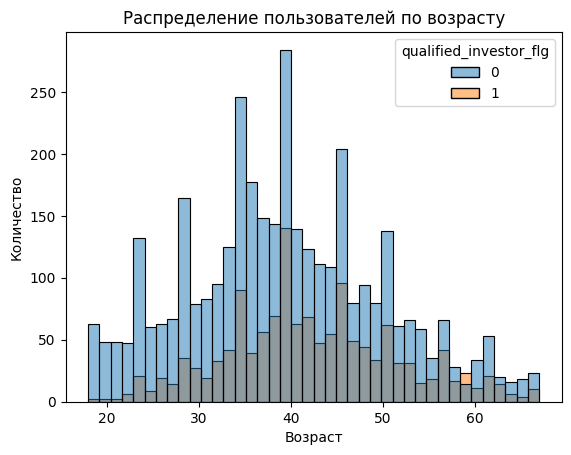

In [161]:
df_unique = df.groupby('id')[['age', 'qualified_investor_flg']].first().reset_index()
sns.histplot(data=df_unique, x='age', hue='qualified_investor_flg', bins=40) #

plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

<Axes: xlabel='qualified_investor_flg', ylabel='age'>

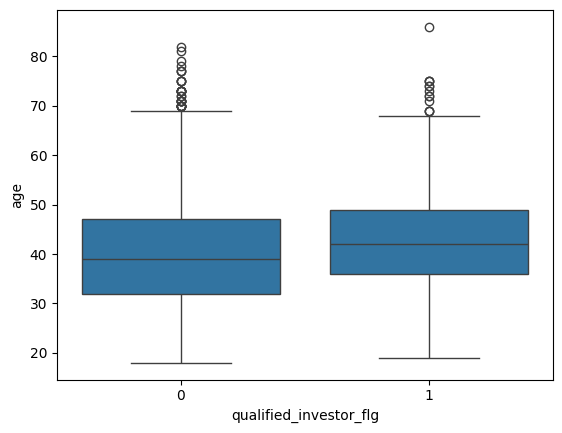

In [148]:
sns.boxplot(x='qualified_investor_flg', y='age', data=df_unique)

Заметим, что на ящиках с усами можно заметить слишком пожилых пользователей, выходящих за верхний ус. По IQR можно точно говорить о том, что это выбросы. Давайте удалим всех пользователей 68 лет и старше (это и есть наблюдаемые выбросы).

In [154]:
df = df.loc[df['age'] <= 67]
df

,id,date,age,education_level_cd,marital_status_cd,children_cnt,monthly_income_amt,invest_utilization_dt,forts_flg,margin_status_flg,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
381130,849233533,2024-02-01,32,0,0,"0,0","6273,0",2018-08-03,0,0,...,"129,0","0,0","0,0","0,0","138,0","0,0","0,0","0,0","0,0","0,0"
160119,1920789639,2024-02-01,38,0,0,"0,0","5023,0",2020-11-06,0,0,...,"0,0","0,0","0,0","-101931,0","2935,0","0,0",0,0,0,0
219174,935203400,2024-02-01,38,0,0,"0,0",0,2021-06-18,1,1,...,"164,0","0,0","0,0",0,"928,0",0,"0,0","0,0","0,0","3,0"
219171,1805259374,2024-02-01,26,SCH,UNM,"0,0","2208,0",2021-04-29,1,1,...,"0,0","0,0","0,0","0,0","19,0","0,0","0,0","0,0","0,0","11,0"
140670,1864959442,2024-02-01,34,UGR,0,"0,0","1007,0",2021-03-03,1,1,...,"198,0","0,0","0,0",0,"608,0",0,"0,0","0,0","0,0","12,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118258,875601163,2024-04-30,55,0,CIV,0,"629,0",2023-12-13,0,0,...,"61,0","0,0","0,0",0,"3,0",0,"0,0","0,0","0,0","0,0"
397055,329694823,2024-04-30,46,0,0,0,0,2023-08-28,0,0,...,"0,0","0,0","0,0",0,"46,0",0,"0,0","0,0","0,0","0,0"
203473,1631260548,2024-04-30,36,0,DIV,"0,0","2544,0",2023-11-03,0,1,...,"39,0","0,0","0,0","0,0","3781,0",0,"0,0","2,0","8,0","72,0"
241315,242127900,2024-04-30,21,0,0,"0,0","2514,0",2021-11-03,1,1,...,"0,0","0,0","0,0","-94000,0","4761,0",0,"0,0","0,0","0,0","42,0"


In [158]:
df['id'].nunique()

5029